# Passo a passo

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
resenhas = pd.read_csv('dados/imdb-reviews-pt-br.csv')
resenhas

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


## Tratamento dos dados

In [3]:
classificacao = resenhas.sentiment.replace(['neg', 'pos'], [0,1])

In [4]:
resenhas['classificacao'] = classificacao

In [5]:
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [6]:
resenhas.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


## Criando uma Bag of Words

In [7]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [8]:
pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

/home/ana/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [9]:
vetorizar = CountVectorizer(lowercase=False, max_features=150)
bag_of_words = vetorizar.fit_transform(resenhas.text_pt)

In [10]:
print(f'A matriz de palavras possui o tamanho: {bag_of_words.shape}')

A matriz de palavras possui o tamanho: (49459, 150)


## Treinando o modelo

In [11]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenhas.classificacao,
                                                              random_state = 42)

In [12]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)

LogisticRegression()

In [13]:
acuracia = regressao_logistica.score(teste, classe_teste)
print(f'Acurácia do modelo: {acuracia}')

Acurácia do modelo: 0.7334411645774364


## Como melhorar a acurácia do modelo?

<p> Para melhorar a acurácia, será preciso garantir que as 50 palavras (max_features) na bag of words sejam as mais relevantes para a classificação </p>

##### função de treino:

In [14]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [15]:
print(classificar_texto(resenhas, "text_pt", "classificacao"))

0.6689041649818035


### Nuvem de palavras

<p> A representação visual das palavras mais frequentes pode ajudar na escolha das mais representativas </p>

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
todas_palavras = ' '.join([texto for texto in resenhas.text_pt])

In [18]:
nuvem_palavras = WordCloud(width=800, height=500,
                          max_font_size=110,
                          collocations=False).generate(todas_palavras)

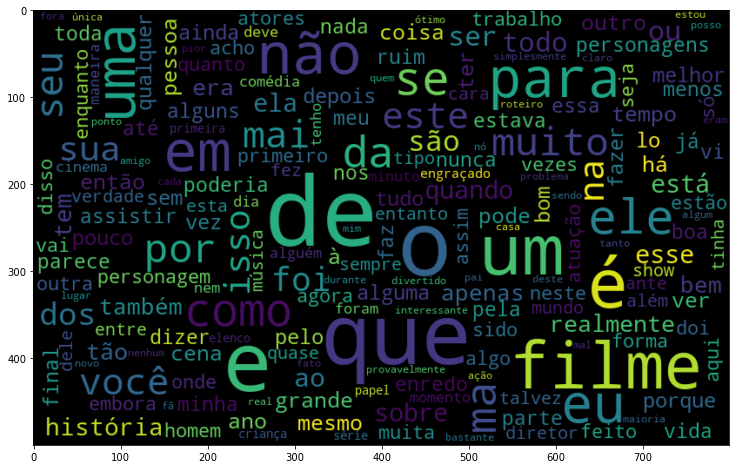

In [19]:
plt.figure(figsize=(13,8))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()

In [20]:
print(f'Total de palavras: {len(todas_palavras)}')

Total de palavras: 63448424


#### Separando wordcloud por tipo de  resenha (positiva e negativa)

In [21]:
def coleta_palavras_neg(coluna):
    texto_negativo = resenhas.query("sentiment == 'neg'")
    return ' '.join([texto for texto in texto_negativo[coluna]])

In [22]:
def coleta_palavras_pos(coluna):
    texto_positivo = resenhas.query("sentiment == 'pos'")
    return ' '.join([texto for texto in texto_positivo[coluna]])

In [23]:
def nuvem_palavras(lista_palavras):
    nuvem = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(lista_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [24]:
print('Palavras associadas a resenhas negativas:')

Palavras associadas a resenhas negativas:


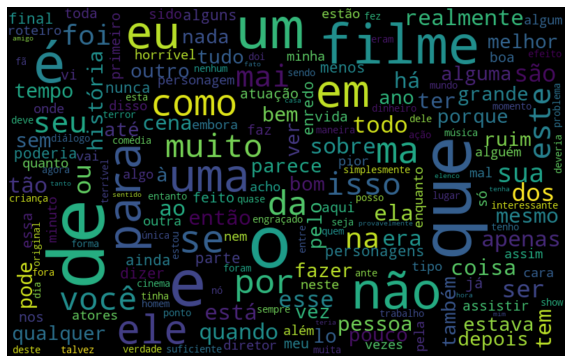

In [25]:
nuvem_palavras(coleta_palavras_neg('text_pt'))

In [26]:
print('Palavras associadas a resenhas positivas:')

Palavras associadas a resenhas positivas:


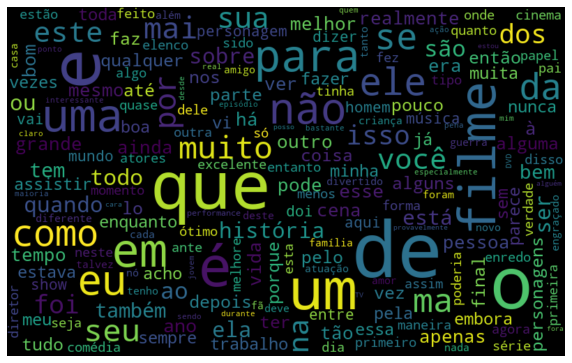

In [27]:
nuvem_palavras(coleta_palavras_pos('text_pt'))

## Tokenização

In [28]:
import nltk
from nltk import tokenize


In [29]:
def tokenizar(lista_palavras):   
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(lista_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequencia": list(frequencia.values())})
    return df_frequencia.nlargest(columns = "Frequencia", n=50)

In [30]:
print(tokenizar(todas_palavras))

       Palavra  Frequencia
20          de      417651
14         que      325070
42           e      299743
3            o      244881
7           um      216410
102          a      210179
45           é      192381
200         em      132778
1          uma      130888
29         não      127915
116       para      126556
8        filme      117543
13          do      101737
32         com       99174
67        como       78361
96          os       73766
151         se       72245
27          eu       68814
235        mas       64788
389         da       61901
9          por       61339
22          no       57145
11        mais       53504
10       muito       51761
306         Eu       51485
225       você       48811
65         ele       47442
55           O       44924
247         na       44208
244        foi       42207
34         dos       41222
75         seu       40460
381         as       39292
676        sua       36724
179       este       34632
125        são       34134
1

## Removendo as palavras mais comuns, como artigos, conjunções etc

In [31]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
palavras_irrelevantes

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [32]:
def limpar_tokens(df, coluna, stopwords):    
    frase_processada = list()
    for opiniao in df[coluna]:
        nova_frase = list()
        token_espaco = tokenize.WhitespaceTokenizer()
        palavras_texto = token_espaco.tokenize(opiniao)
        for palavra in palavras_texto:
            if palavra.lower() not in stopwords:
                nova_frase.append(palavra.lower())
        frase_processada.append(' '.join(nova_frase))
    return frase_processada

In [33]:
palavras_relevantes = limpar_tokens(resenhas, 'text_pt', palavras_irrelevantes)

In [34]:
resenhas['tratamento1'] = palavras_relevantes

In [35]:
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"vez, sr. costner arrumou filme tempo necessári..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes ação mesmos. gen...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever músicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"filmes fotos latão palavra apropriada eles, ve..."


In [36]:
classificar_texto(resenhas, "tratamento1", "classificacao")

0.6865345733926406

# Otimizando o modelo

<p>1. Retirado pontuação</p>

In [37]:
from string import punctuation 
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
pontuacao = [ponto for ponto in punctuation]
print(pontuacao)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [39]:
stopwords = pontuacao + palavras_irrelevantes

In [40]:
print(stopwords)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estive

In [41]:
frase_processada = list()
for opiniao in resenhas["tratamento1"]:
    nova_frase = list()
    token_pontuacao = tokenize.WordPunctTokenizer()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

In [42]:
resenhas['tratamento2'] = frase_processada

In [43]:
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento1,tratamento2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"vez, sr. costner arrumou filme tempo necessári...",vez sr costner arrumou filme tempo necessário ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes ação mesmos. gen...,exemplo motivo maioria filmes ação mesmos gené...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"primeiro tudo odeio raps imbecis, poderiam agi...",primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever músicas todos gostass...,beatles puderam escrever músicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"filmes fotos latão palavra apropriada eles, ve...",filmes fotos latão palavra apropriada verdade ...


In [44]:
classificar_texto(resenhas, "tratamento2", "classificacao")

0.6881520420541852

<p>2. Retirando acentuação </p>

In [45]:
import unidecode

In [46]:
stopwords = [unidecode.unidecode(texto) for texto in stopwords]

In [47]:
print(stopwords)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estive

In [48]:
resenhas["tratamento3"] = [unidecode.unidecode(texto) for texto in resenhas["tratamento2"]]

frase_processada = list()
for opiniao in resenhas["tratamento3"]:
    nova_frase = list()
    token_pontuacao = tokenize.WordPunctTokenizer()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

In [49]:
classificar_texto(resenhas, "tratamento3", "classificacao")

0.6879094217549535

<p> 3. Retirando flexões e derivações </p>

In [50]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/ana/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [51]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")

'corr'

In [52]:
stemmer.stem("correria")

'corr'

In [53]:
stemmer.stem("médico")

'médic'

In [54]:
stemmer.stem("médica")

'médic'

In [55]:
frase_processada = list()
for opiniao in resenhas["tratamento3"]:
    nova_frase = list()
    token_pontuacao = tokenize.WordPunctTokenizer()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
resenhas['tratamento4'] = frase_processada

In [56]:
classificar_texto(resenhas, "tratamento4", "classificacao")

0.6940558026688233

## Aplicando TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
corpus = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer()
matriz = tfidf.fit_transform(corpus)

pd.DataFrame(
    matriz.todense(),
    columns=tfidf.get_feature_names_out()
)

,assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [59]:
tfidf_tratados = tfidf.fit_transform(resenhas["tratamento4"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenhas["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.884270117266478


<p>Uma coisa interessante que a regressão logística nos permite é analisar quais palavras têm maior peso na diferenciação entre as classes e o que o algoritmo está entendendo como palavras negativas ou positivas </p>

In [62]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

In [63]:
pesos.nlargest(10, 0)

,0
otim,8.285324
excel,7.977688
perfeit,6.575279
favorit,5.782270
maravilh,5.280946
incri,5.052266
hilari,4.659027
divert,4.581887
ador,4.438927
brilh,4.259969


In [64]:
pesos.nsmallest(10,0)

,0
ruim,-9.190792
pi,-9.190522
horri,-8.746944
terri,-7.187153
chat,-6.922590
nad,-6.033548
infeliz,-5.309086
decepca,-4.995114
ridicul,-4.959852
nenhum,-4.935240
